In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import random as rd # generating random numbers
import datetime
from sklearn import preprocessing

In [2]:
dataset=pd.read_csv('E:/csv/mediacompany.csv')
dataset.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,03-01-2017,183738,1260228.0,1706478.0,1.060860e+09,0.0,0.0
1,03-02-2017,193763,1270561.0,1690727.0,1.031847e+09,0.0,0.0
2,03-03-2017,210479,1248183.0,1726157.0,1.010868e+09,0.0,0.0
3,03-04-2017,240061,1492913.0,1855353.0,1.079195e+09,1.0,0.0
4,03-05-2017,446314,1594712.0,2041418.0,1.357737e+09,0.0,0.0


In [3]:
dataset.tail(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
78,5/18/2017,135871,1749654.0,2302789.0,1.284860e+09,1.0,0.0
79,5/19/2017,108961,1746735.0,2279036.0,1.246027e+09,1.0,0.0
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,Variable,Explaination,NaN,NaN,NaN,NaN,NaN
82,Views_show,Number of times the show was viewed,NaN,NaN,NaN,NaN,NaN
83,Visitors,"Number of visitors who browsed the platform, b...",NaN,NaN,NaN,NaN,NaN
84,Views_platform,Number of times a video was viewed on the plat...,NaN,NaN,NaN,NaN,NaN
85,Ad_impression,Proxy for marketing budget. Represents number ...,NaN,NaN,NaN,NaN,NaN
86,Cricket_match_india,If a cricket match was being played. 1 indicat...,NaN,NaN,NaN,NaN,NaN
87,Character_A,Describes presence of Character A. 1 indicates...,NaN,NaN,NaN,NaN,NaN


In [4]:
df=dataset.dropna()
df.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
75,5/15/2017,313945,1808684.0,2226788.0,1.398053e+09,1.0,0.0
76,5/16/2017,185689,1814227.0,2199844.0,1.311961e+09,1.0,0.0
77,5/17/2017,142260,1755803.0,2225752.0,1.248266e+09,1.0,0.0
78,5/18/2017,135871,1749654.0,2302789.0,1.284860e+09,1.0,0.0
79,5/19/2017,108961,1746735.0,2279036.0,1.246027e+09,1.0,0.0


In [5]:
#check NAN value and length of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 80 non-null     object 
 1   Views_show           80 non-null     object 
 2   Visitors             80 non-null     float64
 3   Views_platform       80 non-null     float64
 4   Ad_impression        80 non-null     float64
 5   Cricket_match_india  80 non-null     float64
 6   Character_A          80 non-null     float64
dtypes: float64(5), object(2)
memory usage: 5.0+ KB


In [6]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228.0,1706478.0,1.060860e+09,0.0,0.0
1,2017-03-02,193763,1270561.0,1690727.0,1.031847e+09,0.0,0.0
2,2017-03-03,210479,1248183.0,1726157.0,1.010868e+09,0.0,0.0
3,2017-03-04,240061,1492913.0,1855353.0,1.079195e+09,1.0,0.0
4,2017-03-05,446314,1594712.0,2041418.0,1.357737e+09,0.0,0.0


In [7]:
df['Views_show']=df['Views_show'].astype('float')

In [8]:
df.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


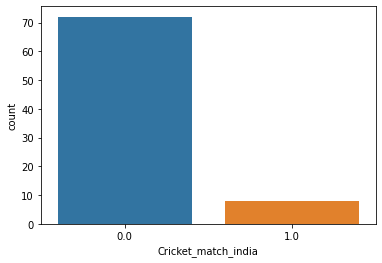

In [9]:
sns.countplot(x='Cricket_match_india',data=df)
plt.show()

In [10]:
df.loc[:,"Character_A"].value_counts().reset_index().rename(columns={'Character_A':'count','index':'Character_A'})

,Character_A,count
0,0.0,50
1,1.0,30


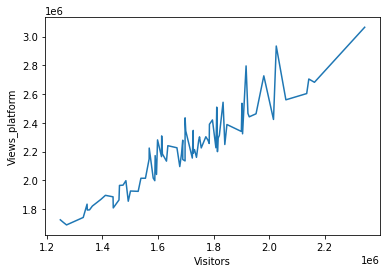

In [11]:
sns.lineplot("Visitors","Views_platform",data=df)
plt.show()

In [12]:
df

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738.0,1260228.0,1706478.0,1.060860e+09,0.0,0.0
1,2017-03-02,193763.0,1270561.0,1690727.0,1.031847e+09,0.0,0.0
2,2017-03-03,210479.0,1248183.0,1726157.0,1.010868e+09,0.0,0.0
3,2017-03-04,240061.0,1492913.0,1855353.0,1.079195e+09,1.0,0.0
4,2017-03-05,446314.0,1594712.0,2041418.0,1.357737e+09,0.0,0.0
...,...,...,...,...,...,...,...
75,2017-05-15,313945.0,1808684.0,2226788.0,1.398053e+09,1.0,0.0
76,2017-05-16,185689.0,1814227.0,2199844.0,1.311961e+09,1.0,0.0
77,2017-05-17,142260.0,1755803.0,2225752.0,1.248266e+09,1.0,0.0
78,2017-05-18,135871.0,1749654.0,2302789.0,1.284860e+09,1.0,0.0


In [13]:
df['Month']=df['Date'].dt.month

In [14]:
monthly_views=df.groupby(['Month'])['Date','Ad_impression','Views_show','Cricket_match_india','Visitors','Views_platform',
'Character_A'].agg({'Date':['min','max'],'Views_show':['min','max','mean'],'Visitors':'mean','Views_platform':'mean','Ad_impression':"mean",
                    'Cricket_match_india':"sum",'Character_A':"sum"})

In [15]:
monthly_views.head()

Date            Views_show                               Visitors  \
             min        max        min       max           mean          mean   
Month                                                                           
3     2017-03-01 2017-03-31   132409.0  650563.0  273731.774194  1.491389e+06   
4     2017-04-01 2017-04-30   162815.0  758631.0  344193.033333  1.826540e+06   
5     2017-05-01 2017-05-19   102520.0  631962.0  230564.947368  1.836633e+06   

      Views_platform Ad_impression Cricket_match_india Character_A  
                mean          mean                 sum         sum  
Month                                                               
3       1.956131e+06  1.362974e+09                 1.0         7.0  
4       2.449883e+06  1.596313e+09                 0.0        23.0  
5       2.297659e+06  1.328860e+09                 7.0         0.0

In [16]:
# It can be seen in fifth month views_show decreased,Cricket_match_india increased,Character_A decreased

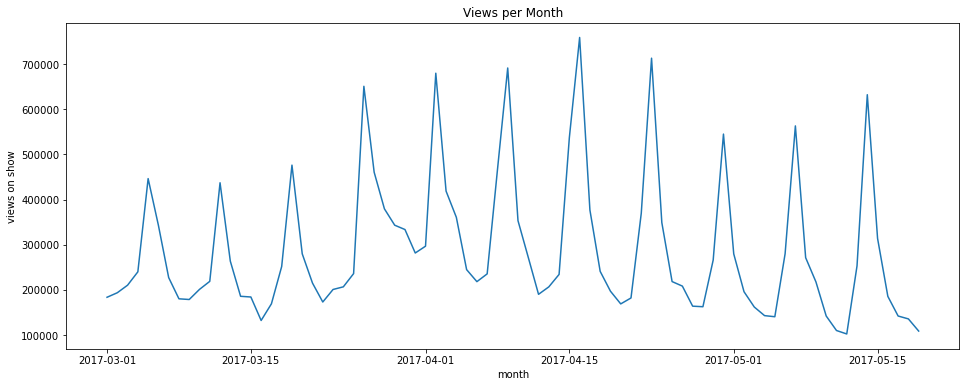

In [17]:
m=df.groupby(['Date'])['Views_show'].sum()
plt.figure(figsize=(16,6))
plt.title("Views per Month")
plt.xlabel("month")
plt.ylabel("views on show")
plt.plot(m)
plt.show()

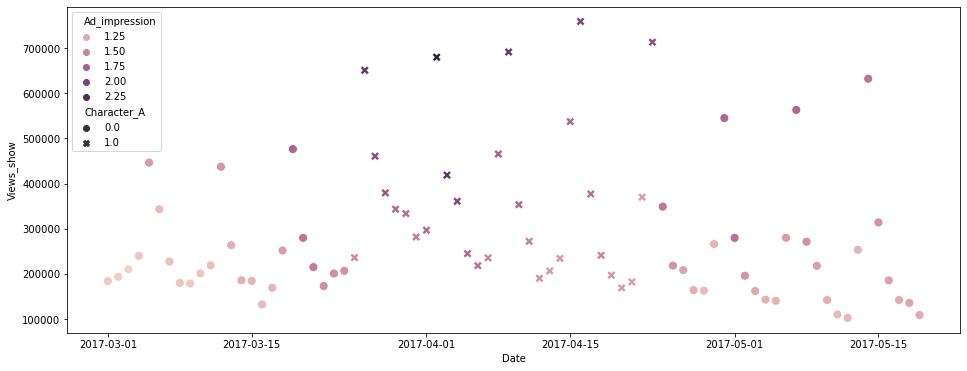

In [18]:
plt.figure(figsize=(16,6))
sns.scatterplot("Date","Views_show",data=df,hue="Ad_impression",style="Character_A",s=80)
plt.show()

In [19]:
df=df.drop(['Month'],axis=1)

In [20]:
scaler = preprocessing.MinMaxScaler()
new_df = scaler.fit_transform(df[['Views_show','Visitors','Views_platform','Ad_impression','Cricket_match_india','Character_A']])
new_df = pd.DataFrame(new_df, columns =['Views_show','Visitors','Views_platform','Ad_impression','Cricket_match_india','Character_A'])
new_df 

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,0.123787,0.010985,0.011466,0.035372,0.0,0.0
1,0.139066,0.020409,0.000000,0.014844,0.0,0.0
2,0.164544,0.000000,0.025792,0.000000,0.0,0.0
3,0.209631,0.223199,0.119842,0.048345,1.0,0.0
4,0.523988,0.316041,0.255290,0.245426,0.0,0.0
...,...,...,...,...,...,...
75,0.322240,0.511188,0.390233,0.273951,1.0,0.0
76,0.126761,0.516244,0.370619,0.213038,1.0,0.0
77,0.060569,0.462960,0.389479,0.167971,1.0,0.0
78,0.050831,0.457352,0.445559,0.193862,1.0,0.0


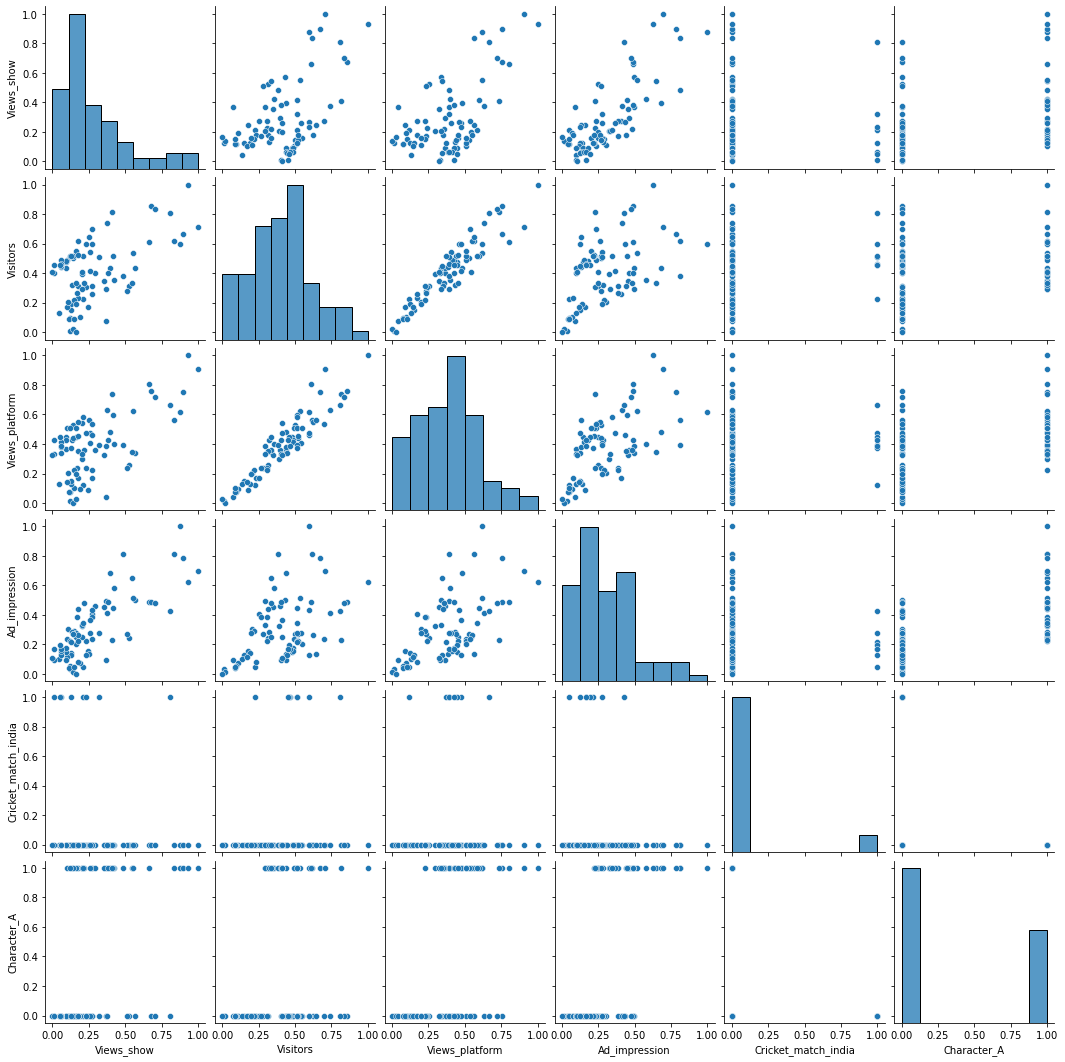

In [21]:
sns.pairplot(new_df)
plt.show()

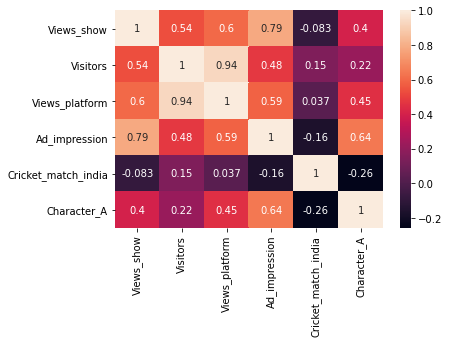

In [22]:
sns.heatmap(new_df.corr(), annot=True)
plt.show()

In [23]:
#It can be seen views of show is correlated with advertisement,Character_A

In [24]:
x=new_df.iloc[:,2:]
y=new_df.iloc[:,1]

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=32)

## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
rgu=LinearRegression()
rgu.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=rgu.predict(x_test)
y_pred

array([0.26032627, 0.11884949, 0.1202581 , 0.5460931 , 0.03912431,
       0.57744558, 0.31996985, 0.25800554, 0.89829427, 0.13446121,
       0.52091983, 0.42167741, 0.62050556, 0.48336256, 0.50129545,
       0.54933903])

In [28]:
y_test

21    0.206039
8     0.088689
7     0.096036
25    0.616401
1     0.020409
56    0.547368
31    0.398242
23    0.194365
46    0.709478
12    0.173926
69    0.522435
58    0.436780
55    0.620733
77    0.462960
44    0.409928
48    0.514335
Name: Visitors, dtype: float64

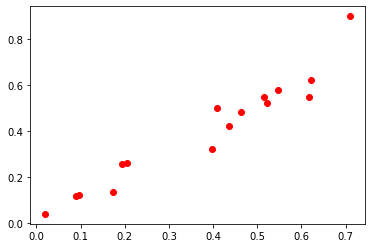

In [29]:
plt.scatter(y_test,y_pred,color='red')
plt.show()

In [30]:
rgu.score(x_test,y_test)

0.9027575161982618

In [31]:
print(rgu.intercept_)
print(rgu.coef_)

0.03856905391799598
[ 1.0462811   0.03740706  0.03100598 -0.11314779]


<AxesSubplot:ylabel='Density'>

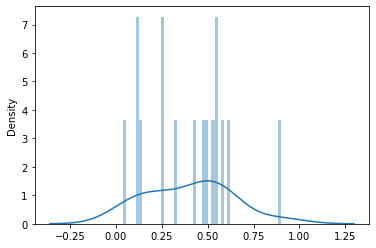

In [32]:
sns.distplot((y_pred),bins=50)

In [33]:
from sklearn import metrics

In [34]:
print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.047598995107351674
MSE: 0.004265460244872764
RMSE: 0.06531049107817796


In [35]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(LinearRegression(),x,y,cv=5)
print(a)
np.mean(a)

[0.55776468 0.40953111 0.20362648 0.80229396 0.78595489]


0.5518342250637247

## Decision Tree

In [36]:
from sklearn import tree
model=tree.DecisionTreeRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.811164024315002

In [37]:
y_pred=model.predict(x_test)

In [38]:
print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.053093424152300076
MSE: 0.008283132182517552
RMSE: 0.09101171453454523


In [39]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(tree.DecisionTreeRegressor(),x,y,cv=5)
print(a)
np.mean(a)

[ 0.07269328  0.67225726 -0.3505502   0.15671177  0.8143946 ]


0.27310134350877996

In [40]:
from sklearn.model_selection import GridSearchCV
reg=GridSearchCV(tree.DecisionTreeRegressor(),{
    "criterion":["mse", "friedman_mse", "mae"]
},cv=5,return_train_score=False)
reg.fit(x,y)
df=pd.DataFrame(reg.cv_results_)
print(reg.best_params_)
print(reg.best_score_)

{'criterion': 'friedman_mse'}
0.33713872237628284


## Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9005879808397514

In [42]:
y_pred=model.predict(x_test)

In [43]:
print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.04750299199611094
MSE: 0.004360625099366191
RMSE: 0.0660350293356957


In [44]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(RandomForestRegressor(),x,y,cv=5)
print(a)
np.mean(a)

[-0.74361968  0.80278317 -0.28606038  0.59939653  0.62763902]


0.20002773269921023

In [45]:
from sklearn.model_selection import GridSearchCV
reg=GridSearchCV(RandomForestRegressor(),{
    "criterion":["mse", "mae"],
    "n_estimators":[1,100,150]
},cv=5,return_train_score=False)
reg.fit(x,y)
df=pd.DataFrame(reg.cv_results_)
print(reg.best_params_)
print(reg.best_score_)

{'criterion': 'mae', 'n_estimators': 1}
0.35061695066434023


##  Support Vector Machine

In [46]:
from sklearn.svm import SVR 
model=SVR()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9073495386563383

In [47]:
y_pred=model.predict(x_test)

In [48]:
print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.0523294289118139
MSE: 0.004064035019264348
RMSE: 0.06374978446445405


In [49]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(SVR(),x,y,cv=5)
print(a)
np.mean(a)

[-2.21145472  0.36686883  0.48169302  0.22202731 -0.015743  ]


-0.23132171301002105

In [50]:
from sklearn.model_selection import GridSearchCV
reg=GridSearchCV(SVR(),{
    "C":[1,10,20],
    "kernel":['rbf','linear'],
    "gamma":['auto','scale']
},cv=5,return_train_score=False)
reg.fit(x,y)
df=pd.DataFrame(reg.cv_results_)
print(reg.best_params_)
print(reg.best_score_)

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.46093931411603356


## KNN Regressor

In [51]:
from sklearn import neighbors
rmse=[]
for k in range(0,20):
    k=k+1
    model=neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    rmse.append(error)
    print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  1 is: 0.10074422692985976
RMSE value for k=  2 is: 0.07037401375662218
RMSE value for k=  3 is: 0.050776211260106036
RMSE value for k=  4 is: 0.047708047707782156
RMSE value for k=  5 is: 0.05243970903684941
RMSE value for k=  6 is: 0.05742372503159423
RMSE value for k=  7 is: 0.061470524542591935
RMSE value for k=  8 is: 0.05921685466309813
RMSE value for k=  9 is: 0.06271235218819521
RMSE value for k=  10 is: 0.06549179243284597
RMSE value for k=  11 is: 0.07309946125567074
RMSE value for k=  12 is: 0.07962640130999
RMSE value for k=  13 is: 0.08827813468652614
RMSE value for k=  14 is: 0.09263426385263795
RMSE value for k=  15 is: 0.09739876769125742
RMSE value for k=  16 is: 0.09779829923847892
RMSE value for k=  17 is: 0.10258783413095217
RMSE value for k=  18 is: 0.11056869909693923
RMSE value for k=  19 is: 0.11395547833193646
RMSE value for k=  20 is: 0.11930637376217601


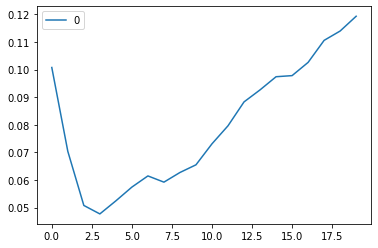

In [52]:
curve=pd.DataFrame(rmse)
curve.plot()
plt.show()

In [53]:
model=neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.9412225515705646

In [54]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(neighbors.KNeighborsRegressor(n_neighbors=3),x,y,cv=5)
print(a)
np.mean(a)

[-2.29588237  0.67458361  0.37270482  0.18287969  0.42389706]


-0.1283634355831581

## Result

* It can be said that views on show decreased mostly due to decrease in advertisement
* Increases in cricket matches and decrease in appearance of character_A are also responsible
* Viewership can be increased by increasing advertisement and appearance of character_A
* Linear is giving best results with prediction score 0.55